Siliguri Institute of Technology
Department of Computer Application

Online Grocery Store

Submitted as Major Project for the degree of
Masters of Computer Applications



 
Project Guide:                                                         Submitted by:
Mrs. Tumpa Banerjee                                          Subhashree Poddar (33601019021)


CERTIFICATE

This is to certify that this project entitled “ONLINE GROCERY STORE” submitted as Major Project for the degree of Masters of Computer Applications to the Siliguri Institute of Technology through Department of Computer Application, done by
Subhashree Poddar (33601019021)
 is an authentic work carried out by him/her under my guidance. The matter embodied in this project work has not been submitted earlier for award of any degree or diploma to the best of my knowledge and belief.


                                                                                               

Signature of the HOD                                                                                 Signature of the Guide

Signature of the External



## Index:

1. **[Requirements](#req)**
2. **[Introduction](#intro)**
3. **[Imports](#imports)**
4. **[Code Body](#code)**
5. **[Conclusion](#conc)**

**Note** : 
- I have used the term Capture Device which simply means Webcam or Camera or any other Video Input devices.
- You have to stop/close the kernel to stop the webcam from popping up again in the screen
- Minor changes or bugs may still tamper the code

<a id='req'></a>
### Required Packages :

1. dlib
	- p install dlib
2. cmake
	- pip install cmake
3. face_recognition
	- pip install face-recognition
3. numpy
	- pip install numpy
5. opencv_python
	- pip install opencv-python
6. boost
	- pip install boost
7. boost_py
	- pip install boost-py
8. face_recognition_models
	- pip install face_recognition_models
9. datetime
    - pip install DateTime


----------------------------------------------------------------------------------------------------


Required Camera Settings :

1. Set your default capture device as the camera you are going to use in your system.
2. Set your camera with the highest resolution available.
3. Allow access to your camera device from the application trying to use it. E.g, Jupyter Notebook, Pycharm, Visual Studio, etc. (Python should be allowed to access the webcam with all of the right permissions)
4. The camera should be atleast 4MP for best results. Other lower form may not produce the best results.
5. 


----------------------------------------------------------------------------------------------------


Other Requirements :
- Allow your browser to access the camera from the system.
- Allow your Jupyter Notebook to access the camera from the system.
- Allow Python to access the camera from the system.


<a id='intro'></a>
# Introduction

Face Recognition — Step by Step

Let’s tackle this problem one step at a time. For each step, we’ll learn about a different machine learning algorithm. I’m not going to explain every single algorithm completely to keep this from turning into a book, but you’ll learn the main ideas behind each one and you’ll learn how you can build your own facial recognition system in Python using OpenFace and dlib.
Step 1: Finding all the Faces

The first step in our pipeline is face detection. Obviously we need to locate the faces in a photograph before we can try to tell them apart!

If you’ve used any camera in the last 10 years, you’ve probably seen face detection in action:

Face detection is a great feature for cameras. When the camera can automatically pick out faces, it can make sure that all the faces are in focus before it takes the picture. But we’ll use it for a different purpose — finding the areas of the image we want to pass on to the next step in our pipeline.

Face detection went mainstream in the early 2000's when Paul Viola and Michael Jones invented a way to detect faces that was fast enough to run on cheap cameras. However, much more reliable solutions exist now. We’re going to use a method invented in 2005 called Histogram of Oriented Gradients — or just HOG for short.

To find faces in an image, we’ll start by making our image black and white because we don’t need color data to find faces:

Then we’ll look at every single pixel in our image one at a time. For every single pixel, we want to look at the pixels that directly surrounding it:

Our goal is to figure out how dark the current pixel is compared to the pixels directly surrounding it. Then we want to draw an arrow showing in which direction the image is getting darker:

Looking at just this one pixel and the pixels touching it, the image is getting darker towards the upper right.

If you repeat that process for every single pixel in the image, you end up with every pixel being replaced by an arrow. These arrows are called gradients and they show the flow from light to dark across the entire image:

This might seem like a random thing to do, but there’s a really good reason for replacing the pixels with gradients. If we analyze pixels directly, really dark images and really light images of the same person will have totally different pixel values. But by only considering the direction that brightness changes, both really dark images and really bright images will end up with the same exact representation. That makes the problem a lot easier to solve!

But saving the gradient for every single pixel gives us way too much detail. We end up missing the forest for the trees. It would be better if we could just see the basic flow of lightness/darkness at a higher level so we could see the basic pattern of the image.

To do this, we’ll break up the image into small squares of 16x16 pixels each. In each square, we’ll count up how many gradients point in each major direction (how many point up, point up-right, point right, etc…). Then we’ll replace that square in the image with the arrow directions that were the strongest.

The end result is we turn the original image into a very simple representation that captures the basic structure of a face in a simple way:

The original image is turned into a HOG representation that captures the major features of the image regardless of image brightnesss.

To find faces in this HOG image, all we have to do is find the part of our image that looks the most similar to a known HOG pattern that was extracted from a bunch of other training faces:

Using this technique, we can now easily find faces in any image:

If you want to try this step out yourself using Python and dlib, here’s code showing how to generate and view HOG representations of images.
Step 2: Posing and Projecting Faces

Whew, we isolated the faces in our image. But now we have to deal with the problem that faces turned different directions look totally different to a computer:

Humans can easily recognize that both images are of Will Ferrell, but computers would see these pictures as two completely different people.

To account for this, we will try to warp each picture so that the eyes and lips are always in the sample place in the image. This will make it a lot easier for us to compare faces in the next steps.

To do this, we are going to use an algorithm called face landmark estimation. There are lots of ways to do this, but we are going to use the approach invented in 2014 by Vahid Kazemi and Josephine Sullivan.

The basic idea is we will come up with 68 specific points (called landmarks) that exist on every face — the top of the chin, the outside edge of each eye, the inner edge of each eyebrow, etc. Then we will train a machine learning algorithm to be able to find these 68 specific points on any face:

The 68 landmarks we will locate on every face. This image was created by Brandon Amos of CMU who works on OpenFace.

Here’s the result of locating the 68 face landmarks on our test image:

PROTIP: You can also use this same technique to implement your own version of Snapchat’s real-time 3d face filters!

Now that we know were the eyes and mouth are, we’ll simply rotate, scale and shear the image so that the eyes and mouth are centered as best as possible. We won’t do any fancy 3d warps because that would introduce distortions into the image. We are only going to use basic image transformations like rotation and scale that preserve parallel lines (called affine transformations):

Now no matter how the face is turned, we are able to center the eyes and mouth are in roughly the same position in the image. This will make our next step a lot more accurate.

If you want to try this step out yourself using Python and dlib, here’s the code for finding face landmarks and here’s the code for transforming the image using those landmarks.
Step 3: Encoding Faces

Now we are to the meat of the problem — actually telling faces apart. This is where things get really interesting!

The simplest approach to face recognition is to directly compare the unknown face we found in Step 2 with all the pictures we have of people that have already been tagged. When we find a previously tagged face that looks very similar to our unknown face, it must be the same person. Seems like a pretty good idea, right?

There’s actually a huge problem with that approach. A site like Facebook with billions of users and a trillion photos can’t possibly loop through every previous-tagged face to compare it to every newly uploaded picture. That would take way too long. They need to be able to recognize faces in milliseconds, not hours.

What we need is a way to extract a few basic measurements from each face. Then we could measure our unknown face the same way and find the known face with the closest measurements. For example, we might measure the size of each ear, the spacing between the eyes, the length of the nose, etc. If you’ve ever watched a bad crime show like CSI, you know what I am talking about:

Just like TV! So real! #science
The most reliable way to measure a face

Ok, so which measurements should we collect from each face to build our known face database? Ear size? Nose length? Eye color? Something else?

It turns out that the measurements that seem obvious to us humans (like eye color) don’t really make sense to a computer looking at individual pixels in an image. Researchers have discovered that the most accurate approach is to let the computer figure out the measurements to collect itself. Deep learning does a better job than humans at figuring out which parts of a face are important to measure.

The solution is to train a Deep Convolutional Neural Network (just like we did in Part 3). But instead of training the network to recognize pictures objects like we did last time, we are going to train it to generate 128 measurements for each face.

The training process works by looking at 3 face images at a time:

    Load a training face image of a known person
    Load another picture of the same known person
    Load a picture of a totally different person

Then the algorithm looks at the measurements it is currently generating for each of those three images. It then tweaks the neural network slightly so that it makes sure the measurements it generates for #1 and #2 are slightly closer while making sure the measurements for #2 and #3 are slightly further apart:

After repeating this step millions of times for millions of images of thousands of different people, the neural network learns to reliably generate 128 measurements for each person. Any ten different pictures of the same person should give roughly the same measurements.

Machine learning people call the 128 measurements of each face an embedding. The idea of reducing complicated raw data like a picture into a list of computer-generated numbers comes up a lot in machine learning (especially in language translation). The exact approach for faces we are using was invented in 2015 by researchers at Google but many similar approaches exist.
Encoding our face image

This process of training a convolutional neural network to output face embeddings requires a lot of data and computer power. Even with an expensive NVidia Telsa video card, it takes about 24 hours of continuous training to get good accuracy.

But once the network has been trained, it can generate measurements for any face, even ones it has never seen before! So this step only needs to be done once. Lucky for us, the fine folks at OpenFace already did this and they published several trained networks which we can directly use. Thanks Brandon Amos and team!

So all we need to do ourselves is run our face images through their pre-trained network to get the 128 measurements for each face. Here’s the measurements for our test image:

So what parts of the face are these 128 numbers measuring exactly? It turns out that we have no idea. It doesn’t really matter to us. All that we care is that the network generates nearly the same numbers when looking at two different pictures of the same person.

If you want to try this step yourself, OpenFace provides a lua script that will generate embeddings all images in a folder and write them to a csv file. You run it like this.
Step 4: Finding the person’s name from the encoding

This last step is actually the easiest step in the whole process. All we have to do is find the person in our database of known people who has the closest measurements to our test image.

You can do that by using any basic machine learning classification algorithm. No fancy deep learning tricks are needed. We’ll use a simple linear SVM classifier, but lots of classification algorithms could work.

All we need to do is train a classifier that can take in the measurements from a new test image and tells which known person is the closest match. Running this classifier takes milliseconds. The result of the classifier is the name of the person!

So let’s try out our system. First, I trained a classifier with the embeddings of about 20 pictures each of Will Ferrell, Chad Smith and Jimmy Falon:

Then I ran the classifier on every frame of the famous youtube video of Will Ferrell and Chad Smith pretending to be each other on the Jimmy Fallon show:

It works! And look how well it works for faces in different poses — even sideways faces!
Running this Yourself

Let’s review the steps we followed: 

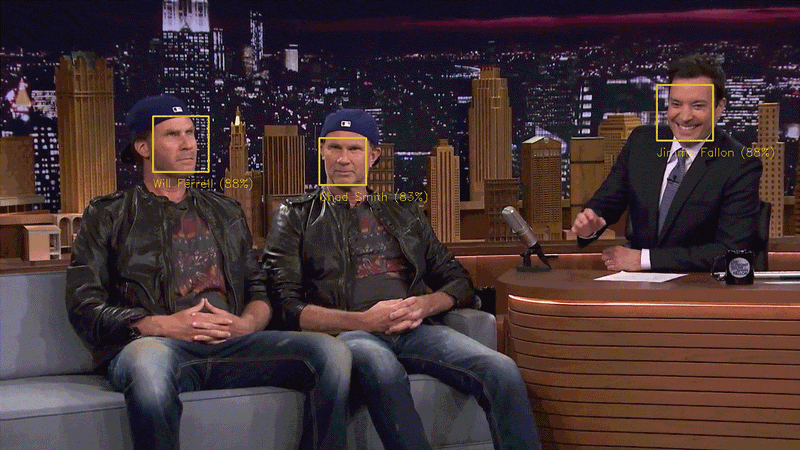

    Encode a picture using the HOG algorithm to create a simplified version of the image. Using this simplified image, find the part of the image that most looks like a generic HOG encoding of a face.
    Figure out the pose of the face by finding the main landmarks in the face. Once we find those landmarks, use them to warp the image so that the eyes and mouth are centered.
    Pass the centered face image through a neural network that knows how to measure features of the face. Save those 128 measurements.
    Looking at all the faces we’ve measured in the past, see which person has the closest measurements to our face’s measurements. That’s our match!

Now that you know how this all works, here’s instructions from start-to-finish of how run this entire face recognition pipeline on your own computer:

<a id='imports'></a>
# Imports

###### Importing all the packages required in the project.

In [1]:
import cv2
import numpy as np
import face_recognition
import os
import csv
from datetime import datetime

<a id=code></a>
# Code Body

###### Coding Section of the Program
- Selecting the path 
- Then creating a list with everything from the path
- Using loop to read every image using cv2 from the created list

In [2]:
#Setting the path of the file
path = 'ExistingData'
images = []
classNames = []

myList = os.listdir(path)
#print(myList) *Optional*

for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
# print(classNames) *Optional*

###### UserDefined function findEncodings which takes in a image and returns another list encodeList
- cv2.cvtColor() method is used to convert an image from one color space to another.
- face_recognition.api.face_encodings()when given an image, return the 128-dimension face encoding for each face in the image.

In [3]:
def findEncodings(images):
    encodeList = []
    for img in images:
        # Using cv2.cvtColor() method
        # Using cv2.COLOR_BGR2GRAY color space
        # conversion code
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #Encoding the face from the image
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

###### UserDefined function markAttendance which takes in a name and writes down the name and time of the person whose face matches from the image and time taken from the capture device into a csv file which if not created beforehand is created in runtime

In [4]:
def markAttendance(name):
    #creates the csv file if not present
    if not os.path.exists('Attendance.csv'):
        #opens the csv, Open for writing.The file is created if it does not exist.
        data = open('Attendance.csv','a',newline='')
        csv_writer = csv.writer(data,delimiter=',')
        data.close()
    #Opens a file for both reading and writing.
    with open('Attendance.csv', 'r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        #Sends the name and time at the first entry of the person if not already present in the file
        if name not in nameList:
            #send the current time
            now = datetime.now()
            #Format of the datetime
            dtString = now.strftime('%H:%M:%S')
            #Writing Name and time into the csv file
            f.writelines(f'\n{name},{dtString}')

###### This will store the Encodings of all the image present into a new list to use it to compare and find the person whose image is being captured in the capture device. 

In [5]:
#Storing the image encodings of each person in a separate list
encodeListKnown = findEncodings(images)
print('Encoding Complete')

IndexError: list index out of range

In [ ]:
# encodeListKnown *Optional*

- cv2.imshow() method is used to display an image in a window. The window automatically fits to the image size.
- waitKey
    - (0) will display the window infinitely until any keypress (it is suitable for image display).
    - (1) will display a frame for 1 ms, after which display will be automatically closed. Since the OS has a minimum time between switching threads, the function will not wait exactly 1 ms, it will wait at least 1 ms, depending on what else is running on your computer at that time.

In [ ]:
#To open default camera using default backend we are passing 0
cap = cv2.VideoCapture(1)

while True:
    success, img = cap.read()
    # img = captureScreen()
    ##Resizing the image to 1/4th of the original image i.e., 0.25% both height and width
    imgS = cv2.resize(img,(0,0),None,0.25,0.25)
    # Using cv2.cvtColor() method
    # Using cv2.COLOR_BGR2GRAY color space
    # conversion code
    imgS = cv2.cvtColor(imgS,cv2.COLOR_BGR2RGB)

    #Returns an array of bounding boxes of human faces in a image
    facesCurFrame = face_recognition.face_locations(imgS)
    #Encoding the face from the current image captured from the Capture Device
    encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

    for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
        #Compare a list of face encodings against a candidate encoding to see if they match
        matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
        #Given a list of face encodings, compare them to a known face encoding and get a euclidean 
        #distance for each comparison face.The distance tells you how similar the faces are.
        faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
        # print(faceDis) *Optional*
        matchIndex = np.argmin(faceDis)
        
        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            print(name)
            y1, x2, y2, x1 = faceLoc
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 1)
            cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
            #Displays the name of the person which matches from the Encodings
            cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            #Calling the function to mark the time for attendance in the csv
            markAttendance(name)
    # Using cv2.imshow() method 
    # Displaying the image 
    cv2.imshow('webcam',img)
    cv2.waitKey(1)

<a id=#conc></a>
# Conclusion

At a strategic level, this project can help reduce the workload of humans and can make the work much easier as all the calculations are done by the system. So, it saves a lot of time and makes the document handling much more easier and convenient.
